In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from scipy import stats


In [2]:
data = pd.read_csv('application_data.csv')
data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [11]:
colunas_selecionadas = [
    'SK_ID_CURR',
    'AMT_CREDIT', 
    'AMT_INCOME_TOTAL', 
    'CNT_CHILDREN',
    'CNT_FAM_MEMBERS',
    'DAYS_BIRTH', 
    'DAYS_EMPLOYED',
    'EXT_SOURCE_2',
    'AMT_ANNUITY', 
    'AMT_GOODS_PRICE', 
    'DAYS_REGISTRATION',
    'FLAG_PHONE',
    'REGION_RATING_CLIENT',
    'TARGET',
    'FLAG_OWN_CAR', 
    'FLAG_OWN_REALTY',
    'NAME_CONTRACT_TYPE',
    'NAME_EDUCATION_TYPE', 
    'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE',
    'NAME_INCOME_TYPE', 
    'NAME_TYPE_SUITE',
    'CODE_GENDER'
] # 23 colunas

df_tratamento = data[colunas_selecionadas]

# Definindo as colunas que têm linhas nulas
colunas_com_nulos = ['NAME_TYPE_SUITE', 'EXT_SOURCE_2', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS']

# Removendo linhas nulas apenas nas colunas especificadas
df_tratamento_sem_nulos = df_tratamento.dropna(subset=colunas_com_nulos)


In [4]:
df_tratamento_sem_nulos

,SK_ID_CURR,AMT_CREDIT,AMT_INCOME_TOTAL,CNT_CHILDREN,CNT_FAM_MEMBERS,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_2,AMT_ANNUITY,AMT_GOODS_PRICE,...,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_CONTRACT_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,NAME_TYPE_SUITE,CODE_GENDER
0,100002,406597.5,202500.0,0,1.0,-9461,-637,0.262949,24700.5,351000.0,...,1,N,Y,Cash loans,Secondary / secondary special,Single / not married,House / apartment,Working,Unaccompanied,M
1,100003,1293502.5,270000.0,0,2.0,-16765,-1188,0.622246,35698.5,1129500.0,...,0,N,N,Cash loans,Higher education,Married,House / apartment,State servant,Family,F
2,100004,135000.0,67500.0,0,1.0,-19046,-225,0.555912,6750.0,135000.0,...,0,Y,Y,Revolving loans,Secondary / secondary special,Single / not married,House / apartment,Working,Unaccompanied,M
3,100006,312682.5,135000.0,0,2.0,-19005,-3039,0.650442,29686.5,297000.0,...,0,N,Y,Cash loans,Secondary / secondary special,Civil marriage,House / apartment,Working,Unaccompanied,F
4,100007,513000.0,121500.0,0,1.0,-19932,-3038,0.322738,21865.5,513000.0,...,0,N,Y,Cash loans,Secondary / secondary special,Single / not married,House / apartment,Working,Unaccompanied,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,254700.0,157500.0,0,1.0,-9327,-236,0.681632,27558.0,225000.0,...,0,N,N,Cash loans,Secondary / secondary special,Separated,With parents,Working,Unaccompanied,M
307507,456252,269550.0,72000.0,0,1.0,-20775,365243,0.115992,12001.5,225000.0,...,0,N,Y,Cash loans,Secondary / secondary special,Widow,House / apartment,Pensioner,Unaccompanied,F
307508,456253,677664.0,153000.0,0,1.0,-14966,-7921,0.535722,29979.0,585000.0,...,0,N,Y,Cash loans,Higher education,Separated,House / apartment,Working,Unaccompanied,F
307509,456254,370107.0,171000.0,0,2.0,-11961,-4786,0.514163,20205.0,319500.0,...,1,N,Y,Cash loans,Secondary / secondary special,Married,House / apartment,Commercial associate,Unaccompanied,F


In [12]:
# 2. Divisão do Conjunto de Dados
# Dividimos os dados em conjuntos de treino e teste para treinar e avaliar os modelos.

# Separar as features (X) e o target (y)
X = df_tratamento_sem_nulos.drop(columns=['TARGET'])
y = df_tratamento_sem_nulos['TARGET']

# Transformar variáveis categóricas em variáveis dummy
X = pd.get_dummies(X)

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# 3. Treinamento de um Modelo de Árvore de Decisão
# Treinamos uma Árvore de Decisão usando DecisionTreeClassifier do Scikit-learn.
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [14]:
# 4. Treinamento de um Modelo de Random Forest
# Treinamos um Random Forest usando RandomForestClassifier do Scikit-learn.
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
y_test

84136     0
255595    0
289036    0
228950    1
135639    1
         ..
238235    0
80121     0
76329     0
135093    0
175005    0
Name: TARGET, Length: 61110, dtype: int64

Decision Tree Model Evaluation
Accuracy: 0.8486
ROC AUC: 0.5273


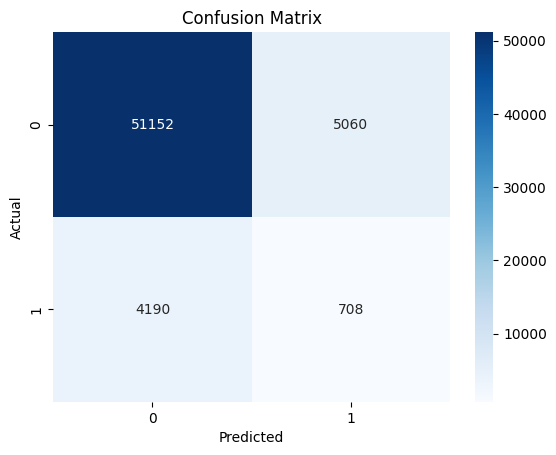

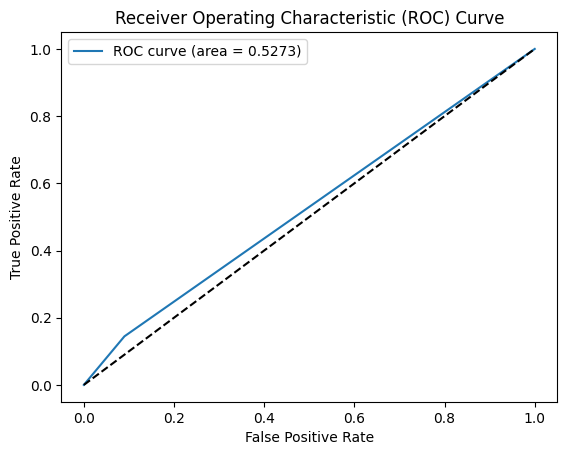

Random Forest Model Evaluation
Accuracy: 0.9198
ROC AUC: 0.6750


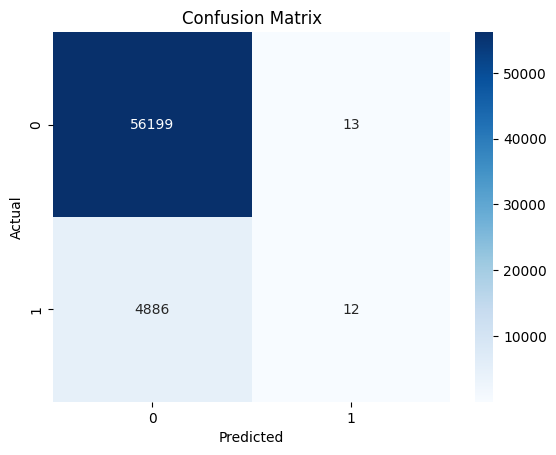

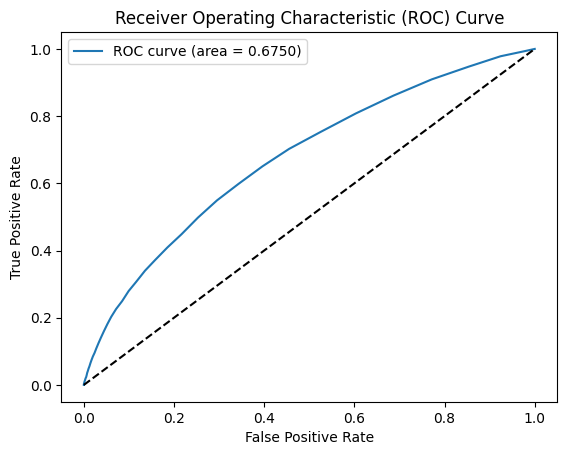

In [16]:
# 5. Avaliação dos Modelos
# Avaliamos os modelos usando métricas como Acurácia, Matriz de Confusão, ROC-AUC, etc.
def evaluate_model(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    fpr, tpr, _ = roc_curve(y_test, y_proba)

    print(f'Accuracy: {acc:.4f}')
    print(f'ROC AUC: {roc_auc:.4f}')
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='best')
    plt.show()

print("Decision Tree Model Evaluation")
evaluate_model(dt_clf, X_test, y_test)

print("Random Forest Model Evaluation")
evaluate_model(rf_clf, X_test, y_test)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Random Forest Model Evaluation
Accuracy: 0.9198
ROC AUC: 0.7038


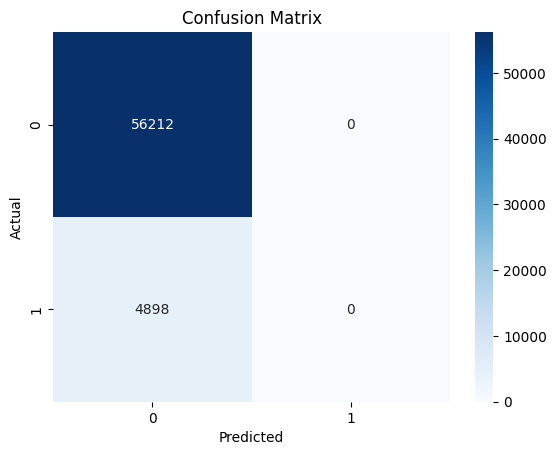

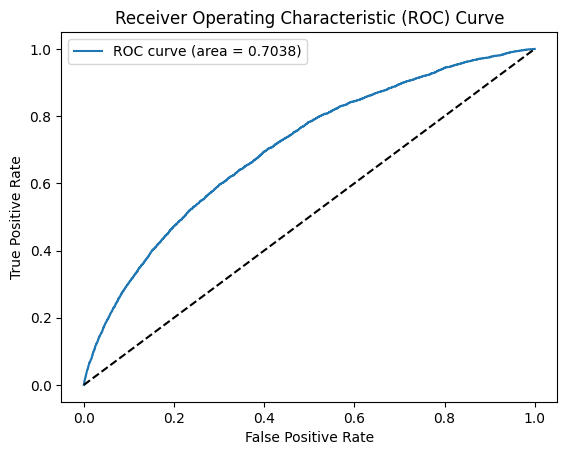

In [17]:
# 6. Ajuste de Hiperparâmetros
# Utilizamos a busca em grade (GridSearchCV) para encontrar os melhores hiperparâmetros para os modelos.
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='roc_auc')
grid_search.fit(X_train, y_train)

best_rf_clf = grid_search.best_estimator_

print("Best Random Forest Model Evaluation")
evaluate_model(best_rf_clf, X_test, y_test)

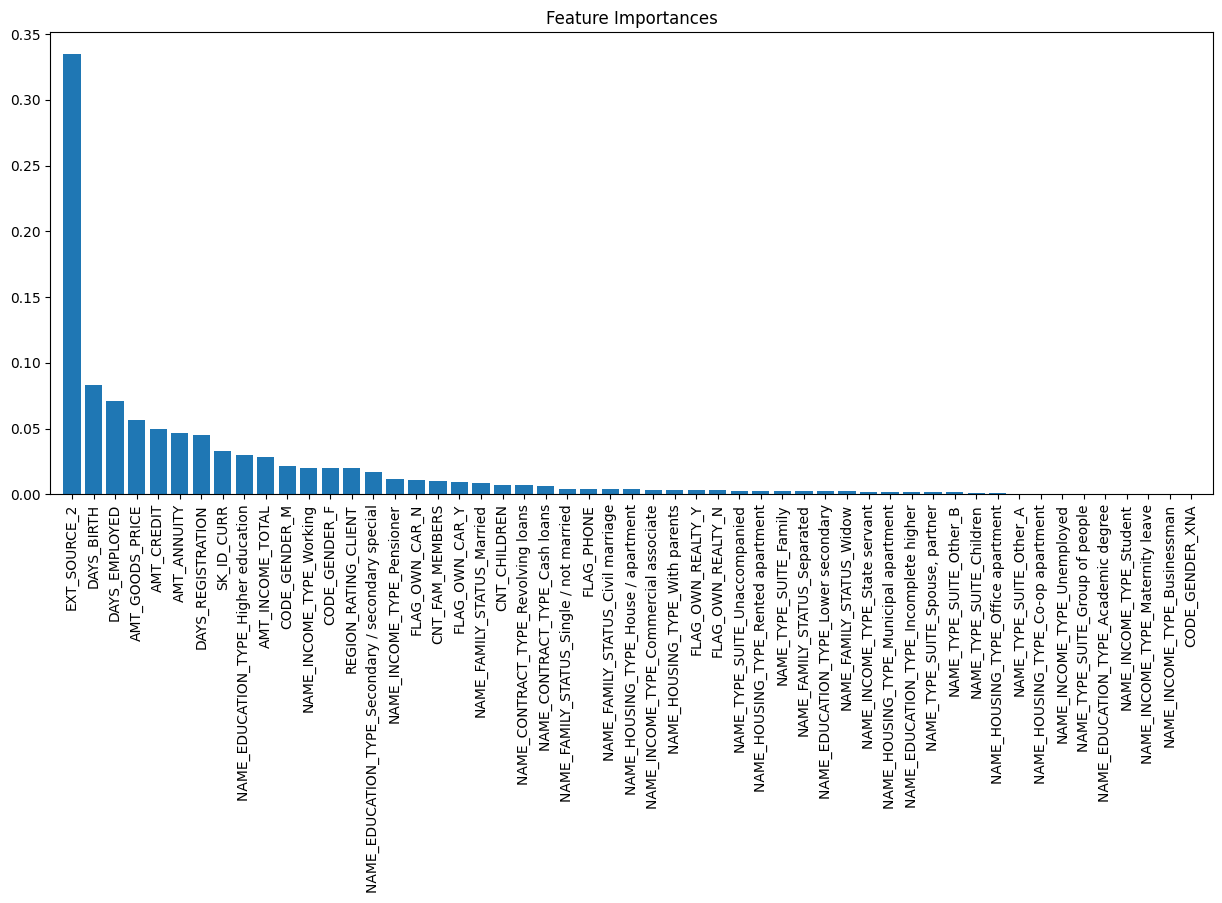

In [18]:
# 7. Visualização dos Resultados
# Visualizamos a importância das características e as métricas de desempenho dos modelos.
# Importância das características
importances = best_rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(15, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()